## RECIPE RECOMMENDATION SYSTEM

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('50 dishes.csv')
df

,dish_name,recipe_version,ingredients,cooking_time_min,difficulty,calories,user_reviews,taste_rating,health_rating,overall_rating
0,Pasta Alfredo,Recipe A,"pasta, mint, spices, masala, rice, oil",10,Easy,183,88,3.7,3.7,3.2
1,Pasta Alfredo,Recipe B,"pasta, spices, ghee, garlic, curd, soy sauce",20,Medium,421,188,5.0,4.9,4.6
2,Pasta Alfredo,Recipe C,"pasta, cream, butter, coriander, masala, rice",45,Medium,435,154,3.8,3.9,3.3
3,Chicken Curry,Recipe A,"chicken, vegetables, spices, curd, butter, salt",30,Hard,230,297,3.3,2.7,4.9
4,Chicken Curry,Recipe B,"chicken, vegetables, coriander, spices, tomato...",10,Easy,836,342,4.6,3.2,4.8
...,...,...,...,...,...,...,...,...,...,...
145,Roti Curry,Recipe B,"roti, ginger, butter, vegetables, coriander, m...",54,Easy,756,177,4.3,2.7,3.7
146,Roti Curry,Recipe C,"roti, soy sauce, pepper, cheese, mint, oil",51,Hard,763,132,4.6,3.8,3.9
147,Veg Biryani,Recipe A,"veg, cream, coriander, salt, basil, mint",40,Easy,845,498,3.2,2.9,3.2
148,Veg Biryani,Recipe B,"veg, coriander, herbs, ghee, tomato, basil",44,Easy,334,383,3.2,2.5,4.6


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dish_name         150 non-null    object 
 1   recipe_version    150 non-null    object 
 2   ingredients       150 non-null    object 
 3   cooking_time_min  150 non-null    int64  
 4   difficulty        150 non-null    object 
 5   calories          150 non-null    int64  
 6   user_reviews      150 non-null    int64  
 7   taste_rating      150 non-null    float64
 8   health_rating     150 non-null    float64
 9   overall_rating    150 non-null    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 11.8+ KB


In [6]:
df.isnull().sum()

dish_name           0
recipe_version      0
ingredients         0
cooking_time_min    0
difficulty          0
calories            0
user_reviews        0
taste_rating        0
health_rating       0
overall_rating      0
dtype: int64

In [7]:
df.shape

(150, 10)

In [8]:
df.describe()

,cooking_time_min,calories,user_reviews,taste_rating,health_rating,overall_rating
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,36.186667,526.406667,275.593333,4.032667,3.668000,3.992667
std,15.637842,214.066386,128.928735,0.590699,0.756743,0.573942
min,10.000000,154.000000,50.000000,3.000000,2.500000,3.000000
25%,22.250000,335.750000,163.000000,3.500000,2.900000,3.500000
50%,39.000000,546.000000,293.000000,4.000000,3.600000,4.000000
75%,50.000000,710.000000,381.750000,4.575000,4.400000,4.500000
max,60.000000,887.000000,498.000000,5.000000,5.000000,5.000000


In [9]:
df['dish_name'].value_counts()

dish_name
Pasta Alfredo           3
Chicken Curry           3
Veg Fried Rice          3
Paneer Butter Masala    3
Chicken Biryani         3
Mushroom Soup           3
Egg Fried Rice          3
Masala Dosa             3
Idli Sambar             3
Upma                    3
Pizza Margherita        3
Grilled Sandwich        3
Omelette                3
Dal Tadka               3
Chole Bhature           3
Sushi Roll              3
Ramen                   3
French Fries            3
Burger                  3
Pancakes                3
Fish Curry              3
Prawn Fry               3
Aloo Paratha            3
Mutton Curry            3
Caesar Salad            3
Tomato Soup             3
Falooda                 3
Chocolate Cake          3
Lemon Rice              3
Sambar Rice             3
Chicken Fried Rice      3
Beef Steak              3
Veg Pulao               3
Rajma Chawal            3
Pav Bhaji               3
Tandoori Chicken        3
Garlic Bread            3
Shawarma                3
Ve

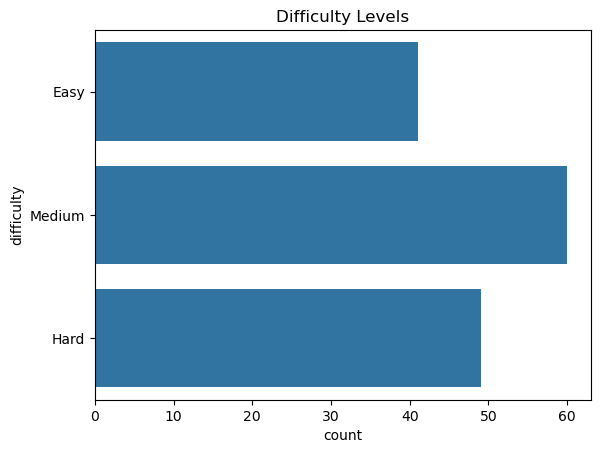

In [10]:
sns.countplot(df['difficulty'])
plt.title("Difficulty Levels")
plt.show()

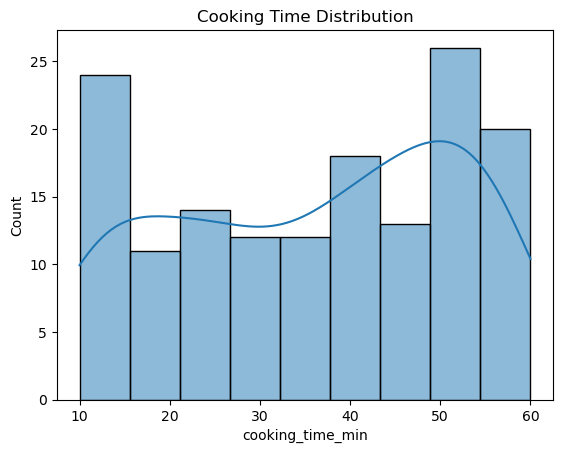

In [11]:
sns.histplot(df['cooking_time_min'], kde=True)
plt.title("Cooking Time Distribution")
plt.show()

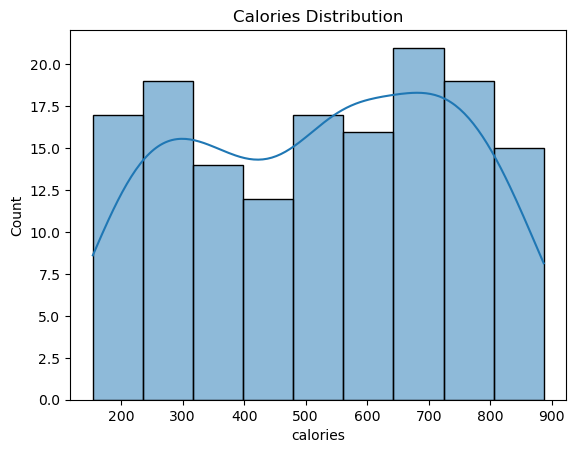

In [12]:
sns.histplot(df['calories'], kde=True)
plt.title("Calories Distribution")
plt.show()

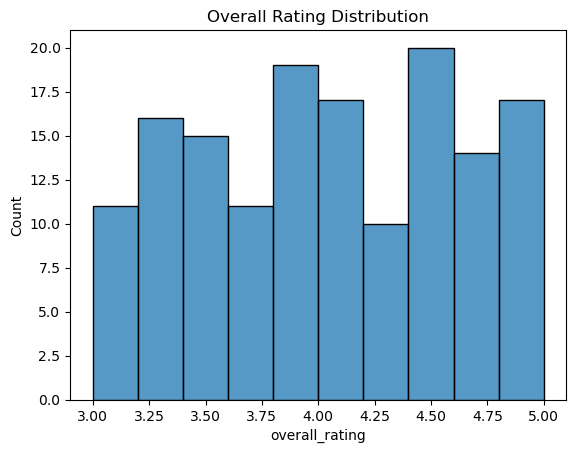

In [13]:
sns.histplot(df['overall_rating'], bins=10)
plt.title("Overall Rating Distribution")
plt.show()


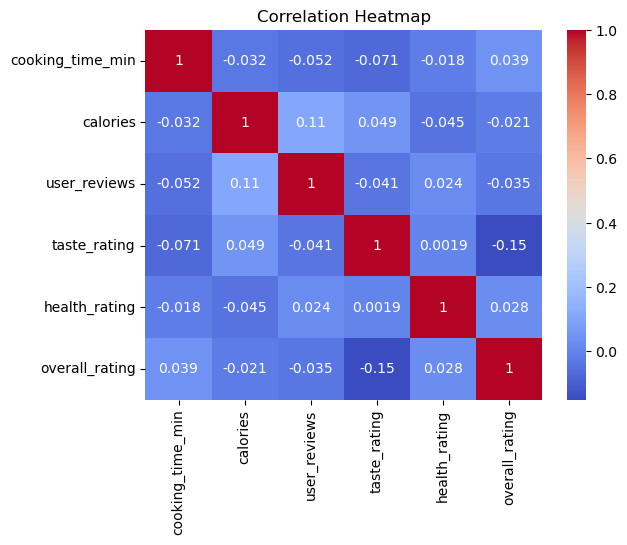

In [14]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [15]:
df.groupby('dish_name')['overall_rating'].mean().sort_values(ascending=False).head(10)

dish_name
Cutlet                  4.666667
Veg Momos               4.666667
Veg Pulao               4.666667
Paneer Butter Masala    4.600000
Sambar Rice             4.533333
French Fries            4.500000
Chicken Roll            4.466667
Upma                    4.300000
Veg Fried Rice          4.300000
Chicken Curry           4.266667
Name: overall_rating, dtype: float64

In [16]:
df.groupby('recipe_version')['overall_rating'].mean()

recipe_version
Recipe A    3.940
Recipe B    4.062
Recipe C    3.976
Name: overall_rating, dtype: float64

In [17]:
df.groupby('dish_name')['calories'].mean().sort_values().head(10)

dish_name
Fried Fish              318.000000
Pasta Alfredo           346.333333
Bhel Puri               355.000000
Prawn Fry               368.000000
Chole Bhature           375.333333
Paneer Butter Masala    396.333333
Chocolate Cake          396.333333
Chicken Manchurian      414.666667
Tandoori Chicken        422.000000
Gobi Manchurian         423.666667
Name: calories, dtype: float64

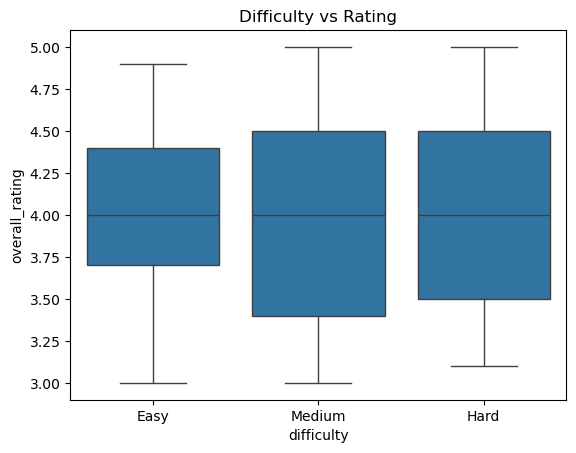

In [18]:
sns.boxplot(data=df, x='difficulty', y='overall_rating')
plt.title("Difficulty vs Rating")
plt.show()

In [19]:
best_recipes = df.loc[df.groupby('dish_name')['overall_rating'].idxmax()]
best_recipes[['dish_name','recipe_version','overall_rating','ingredients']]

,dish_name,recipe_version,overall_rating,ingredients
68,Aloo Paratha,Recipe C,4.6,"aloo, onion, pepper, ghee, garlic, coriander"
94,Beef Steak,Recipe B,4.4,"beef, mint, rice, curd, cheese, basil"
120,Bhel Puri,Recipe A,4.5,"bhel, curd, butter, tomato, salt, rice"
54,Burger,Recipe A,4.5,"burger, curd, oil, cream, ghee, spices"
74,Caesar Salad,Recipe C,4.0,"caesar, ginger, butter, ghee, rice, vegetables"
13,Chicken Biryani,Recipe B,4.4,"chicken, ghee, curd, cheese, coriander, soy sauce"
3,Chicken Curry,Recipe A,4.9,"chicken, vegetables, spices, curd, butter, salt"
92,Chicken Fried Rice,Recipe C,3.7,"chicken, pepper, vegetables, herbs, salt, soy ..."
141,Chicken Manchurian,Recipe A,4.9,"chicken, salt, herbs, coriander, mint, oil"
117,Chicken Momos,Recipe A,4.1,"chicken, herbs, garlic, curd, oil, tomato"


## Summary of the Dataset Analysis

## Conclusion

In [ ]:
The analysis clearly shows that the dataset is well-balanced and offers strong insights into recipe performance. Most dishes are easy to cook, moderately calorie-dense, and receive positive feedback, making them appealing to a broad group of users. Ratings are strongly influenced by user reviews and taste scores, while difficulty and cooking time play a smaller role.
Each dish has variations, and the analysis identifies the best recipe version based on highest overall rating, making it useful for:
Food recommendation systems
Nutritional comparison
Recipe optimization
Machine learning models predicting recipe quality
Overall, the dataset demonstrates that user preferences are driven more by flavor, satisfaction, and popularity, rather than cooking difficulty or calorie count. This makes it a valuable dataset for building ML models, dashboards, and recommendation engines.

 